<a href="https://colab.research.google.com/github/kav95/torch_practise/blob/master/GradientDescent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'X')

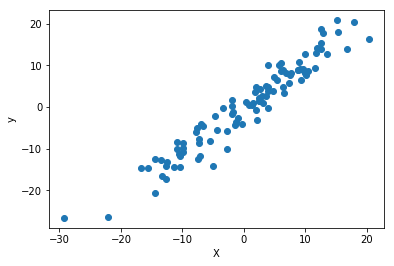

In [2]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X, y, 'o')
plt.ylabel('y')
plt.xlabel('X')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [0]:
torch.manual_seed(1)
model = LR(1, 1)

In [0]:
[w, b] = model.parameters()

def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  [w, b] = get_params()
  x1 = np.array([-30, 30])
  y1 = w*x1 + b
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

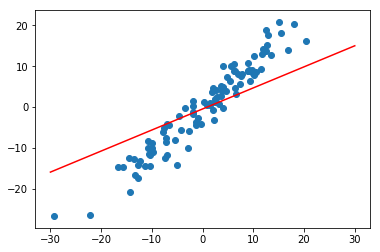

In [7]:
plot_fit('Initial model')

In [8]:
criterion = nn.MSELoss()
optimiser = torch.optim.SGD(model.parameters(), lr = 0.01)

epochs = 100
losses = []

for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch: ", i, "loss: ", loss)
  
  losses.append(loss)
  optimiser.zero_grad()
  loss.backward()
  optimiser.step()

epoch:  0 loss:  tensor(34.8674, grad_fn=<MseLossBackward>)
epoch:  1 loss:  tensor(25.8198, grad_fn=<MseLossBackward>)
epoch:  2 loss:  tensor(19.8054, grad_fn=<MseLossBackward>)
epoch:  3 loss:  tensor(15.8073, grad_fn=<MseLossBackward>)
epoch:  4 loss:  tensor(13.1494, grad_fn=<MseLossBackward>)
epoch:  5 loss:  tensor(11.3823, grad_fn=<MseLossBackward>)
epoch:  6 loss:  tensor(10.2075, grad_fn=<MseLossBackward>)
epoch:  7 loss:  tensor(9.4263, grad_fn=<MseLossBackward>)
epoch:  8 loss:  tensor(8.9067, grad_fn=<MseLossBackward>)
epoch:  9 loss:  tensor(8.5611, grad_fn=<MseLossBackward>)
epoch:  10 loss:  tensor(8.3312, grad_fn=<MseLossBackward>)
epoch:  11 loss:  tensor(8.1781, grad_fn=<MseLossBackward>)
epoch:  12 loss:  tensor(8.0761, grad_fn=<MseLossBackward>)
epoch:  13 loss:  tensor(8.0081, grad_fn=<MseLossBackward>)
epoch:  14 loss:  tensor(7.9627, grad_fn=<MseLossBackward>)
epoch:  15 loss:  tensor(7.9323, grad_fn=<MseLossBackward>)
epoch:  16 loss:  tensor(7.9120, grad_fn=<M

Text(0.5, 0, 'epoch')

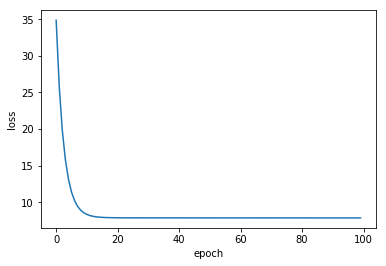

In [9]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')

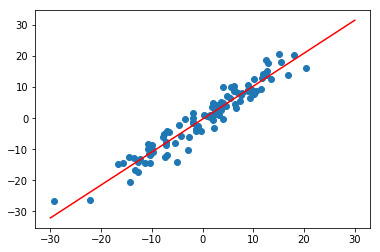

In [10]:
plot_fit('Trained model')